In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder

Read data

In [116]:
df = pd.read_csv("F:\\ML\\Machine Learning\\CSV file\\bank_marketing_dataset.csv",sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


Preprocess and Cleaning the data

In [117]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [118]:
df.age.describe()

count    4521.000000
mean       41.170095
std        10.576211
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        87.000000
Name: age, dtype: float64

In [119]:
df.job.unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [120]:
df[df['job'] == 'unknown'].count()

age          38
job          38
marital      38
education    38
default      38
balance      38
housing      38
loan         38
contact      38
day          38
month        38
duration     38
campaign     38
pdays        38
previous     38
poutcome     38
y            38
dtype: int64

In [121]:
(df == 'unknown').sum()

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

In [122]:
df['age'].mode()

0    34
Name: age, dtype: int64

In [123]:
df['age'].median()

np.float64(39.0)

In [124]:
df['age'] = df['age'].replace('unknown',df['age'].median())

In [125]:
(df == 'unknown').sum()

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

In [126]:
df.job.unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [127]:
df = df[df['job'] != 'unknown']

In [128]:
(df['job'] == 'unknown').sum()

np.int64(0)

In [129]:
df['job'].value_counts()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
Name: count, dtype: int64

In [130]:
df.shape

(4483, 17)

In [131]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [132]:
df.contact.unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [133]:
(df["contact"] == 'unknown').sum()

np.int64(1315)

In [134]:
df['contact'] = df['contact'].replace('unknown','none')

C:\Users\HP\AppData\Local\Temp\ipykernel_14204\696819319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contact'] = df['contact'].replace('unknown','none')


In [135]:
(df["contact"] == 'unknown').sum()

np.int64(0)

In [136]:
(df == 'unknown').sum()

age             0
job             0
marital         0
education     172
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3673
y               0
dtype: int64

In [137]:
df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [138]:
df['poutcome'] = df['poutcome'].replace('unknown', 'none')

C:\Users\HP\AppData\Local\Temp\ipykernel_14204\3893811356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['poutcome'] = df['poutcome'].replace('unknown', 'none')


In [139]:
df.education.unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [140]:
df['education'] = df['education'].replace('unknown', df['education'].mode()[0])

C:\Users\HP\AppData\Local\Temp\ipykernel_14204\3175800973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education'] = df['education'].replace('unknown', df['education'].mode()[0])


In [141]:
( df == 'unknown' ).sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [142]:
df.pdays.unique()

array([ -1, 339, 330, 176, 147, 241, 152, 105, 342, 101,   5,  92,  56,
       170, 182, 297, 196, 460, 137, 367, 145, 169, 207, 266, 288, 168,
       345, 436,  90, 183, 146, 335, 347, 119,   7, 271, 181,  88, 141,
       126,  61, 373, 351, 242,  62,  91, 308, 250, 172, 265,  78,  28,
        79,   1, 188, 167,  89, 164, 462, 209, 321, 254,  94, 364,  96,
       356, 149, 363, 275, 325, 341, 260, 358,  87, 303,  98, 327, 337,
       322, 102,  99, 370,  84, 212,  63,  81, 191, 360, 332,  80,  85,
       247, 150, 175, 382, 261, 336,  58, 206, 112, 199, 133, 208, 253,
       135, 278, 140, 298, 273, 124, 281, 162, 323, 349, 117,   2, 256,
       333, 116, 268, 136, 198, 357, 259, 353, 174, 371, 205, 246,  69,
       315, 110, 461, 184, 270, 127, 187,  64, 130, 346, 100, 352, 808,
       113, 378, 292, 287, 107, 293, 139, 138, 193, 274,  97, 103, 359,
       185, 674, 211, 300, 334, 280, 479,  95, 262, 362, 225,   3, 366,
        60, 190, 368, 122, 343, 131, 365, 299, 115, 316, 180, 15

In [143]:

df['previous_contact'] = df['pdays'].apply(lambda x: 0 if x == -1 else 1)

df['pdays'] = df['pdays'].apply(lambda x: 0 if x == -1 else x)


C:\Users\HP\AppData\Local\Temp\ipykernel_14204\3303500944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['previous_contact'] = df['pdays'].apply(lambda x: 0 if x == -1 else 1)
C:\Users\HP\AppData\Local\Temp\ipykernel_14204\3303500944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pdays'] = df['pdays'].apply(lambda x: 0 if x == -1 else x)


In [144]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,previous_contact
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,0,0,none,no,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,1
3,30,management,married,tertiary,no,1476,yes,yes,none,3,jun,199,4,0,0,none,no,0
4,59,blue-collar,married,secondary,no,0,yes,no,none,5,may,226,1,0,0,none,no,0


In [145]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,previous_contact
count,4483.000000,4483.000000,4483.000000,4483.000000,4483.000000,4483.000000,4483.000000,4483.000000
mean,41.111309,1421.987731,15.915905,264.360027,2.795673,40.615882,0.542940,0.180683
std,10.559382,3017.124448,8.235155,260.273544,3.116897,99.575806,1.696552,0.384798
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000
25%,33.000000,67.000000,9.000000,104.000000,1.000000,0.000000,0.000000,0.000000
50%,39.000000,443.000000,16.000000,185.000000,2.000000,0.000000,0.000000,0.000000
75%,48.000000,1474.000000,21.000000,329.500000,3.000000,0.000000,0.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,1.000000


In [146]:
scaler = StandardScaler()

In [147]:
df['balance'] = scaler.fit_transform(df[['balance']])

C:\Users\HP\AppData\Local\Temp\ipykernel_14204\2716334213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balance'] = scaler.fit_transform(df[['balance']])


In [148]:
df['pdays'] = scaler.fit_transform(df[['pdays']])

C:\Users\HP\AppData\Local\Temp\ipykernel_14204\2293140078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pdays'] = scaler.fit_transform(df[['pdays']])


In [149]:
df['age'] = scaler.fit_transform(df[['age']])

C:\Users\HP\AppData\Local\Temp\ipykernel_14204\3497723398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = scaler.fit_transform(df[['age']])


In [150]:
df['day'] = scaler.fit_transform(df[['day']])

C:\Users\HP\AppData\Local\Temp\ipykernel_14204\866648259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = scaler.fit_transform(df[['day']])


In [151]:
df['duration'] = scaler.fit_transform(df[['duration']])

C:\Users\HP\AppData\Local\Temp\ipykernel_14204\989570817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = scaler.fit_transform(df[['duration']])


In [152]:
df['previous'] = scaler.fit_transform(df[['previous']])

C:\Users\HP\AppData\Local\Temp\ipykernel_14204\1794912971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['previous'] = scaler.fit_transform(df[['previous']])


In [153]:
df['campaign'] = scaler.fit_transform(df[['campaign']])

C:\Users\HP\AppData\Local\Temp\ipykernel_14204\1427143469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['campaign'] = scaler.fit_transform(df[['campaign']])


In [154]:
df['previous_contact'] = scaler.fit_transform(df[['previous_contact']])

C:\Users\HP\AppData\Local\Temp\ipykernel_14204\2596261091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['previous_contact'] = scaler.fit_transform(df[['previous_contact']])


In [155]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,previous_contact
count,4.483000e+03,4.483000e+03,4.483000e+03,4.483000e+03,4.483000e+03,4.483000e+03,4.483000e+03,4.483000e+03
mean,8.717343e-18,1.822717e-17,7.449366e-17,8.955089e-17,1.981214e-17,1.981214e-17,-2.615203e-17,-2.298209e-17
std,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00
min,-2.094230e+00,-1.569546e+00,-1.811450e+00,-1.000444e+00,-5.761733e-01,-4.079346e-01,-3.200613e-01,-4.696043e-01
25%,-7.682471e-01,-4.491492e-01,-8.398963e-01,-6.161898e-01,-5.761733e-01,-4.079346e-01,-3.200613e-01,-4.696043e-01
50%,-1.999686e-01,-3.245133e-01,1.021290e-02,-3.049441e-01,-2.553056e-01,-4.079346e-01,-3.200613e-01,-4.696043e-01
75%,6.524491e-01,1.724094e-02,6.174337e-01,2.503030e-01,6.556208e-02,-4.079346e-01,-3.200613e-01,-4.696043e-01
max,4.346259e+00,2.312593e+01,1.831875e+00,1.060787e+01,1.514634e+01,8.340146e+00,1.441736e+01,2.129452e+00


In [156]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,previous_contact
0,-1.052386,unemployed,married,primary,no,0.120994,no,no,cellular,0.374545,oct,-0.712253,-0.576173,-0.407935,-0.320061,none,no,-0.469604
1,-0.768247,services,married,secondary,no,1.116092,yes,yes,cellular,-0.597008,may,-0.170455,-0.576173,2.996887,2.037925,failure,no,2.129452
2,-0.578821,management,single,tertiary,no,-0.023862,yes,no,cellular,0.010213,apr,-0.304944,-0.576173,2.906493,0.269435,failure,no,2.129452
3,-1.052386,management,married,tertiary,no,0.017904,yes,yes,none,-1.568561,jun,-0.251149,0.386430,-0.407935,-0.320061,none,no,-0.469604
4,1.694293,blue-collar,married,secondary,no,-0.471358,yes,no,none,-1.325673,may,-0.147400,-0.576173,-0.407935,-0.320061,none,no,-0.469604


In [157]:
#binary_cols = ['default', 'housing', 'loan', 'y']


#onehot_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 
                    'loan', 'contact', 'month', 'poutcome', 'y']



In [158]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

#df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14204\3350244816.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\HP\AppData\Local\Temp\ipykernel_14204\3350244816.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\HP\AppData\Local\Temp\ipykernel_14204\3350244816.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [159]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,previous_contact
0,-1.052386,10,1,0,0,0.120994,0,0,0,0.374545,10,-0.712253,-0.576173,-0.407935,-0.320061,1,0,-0.469604
1,-0.768247,7,1,1,0,1.116092,1,1,0,-0.597008,8,-0.170455,-0.576173,2.996887,2.037925,0,0,2.129452
2,-0.578821,4,2,2,0,-0.023862,1,0,0,0.010213,0,-0.304944,-0.576173,2.906493,0.269435,0,0,2.129452
3,-1.052386,4,1,2,0,0.017904,1,1,1,-1.568561,6,-0.251149,0.386430,-0.407935,-0.320061,1,0,-0.469604
4,1.694293,1,1,1,0,-0.471358,1,0,1,-1.325673,8,-0.147400,-0.576173,-0.407935,-0.320061,1,0,-0.469604


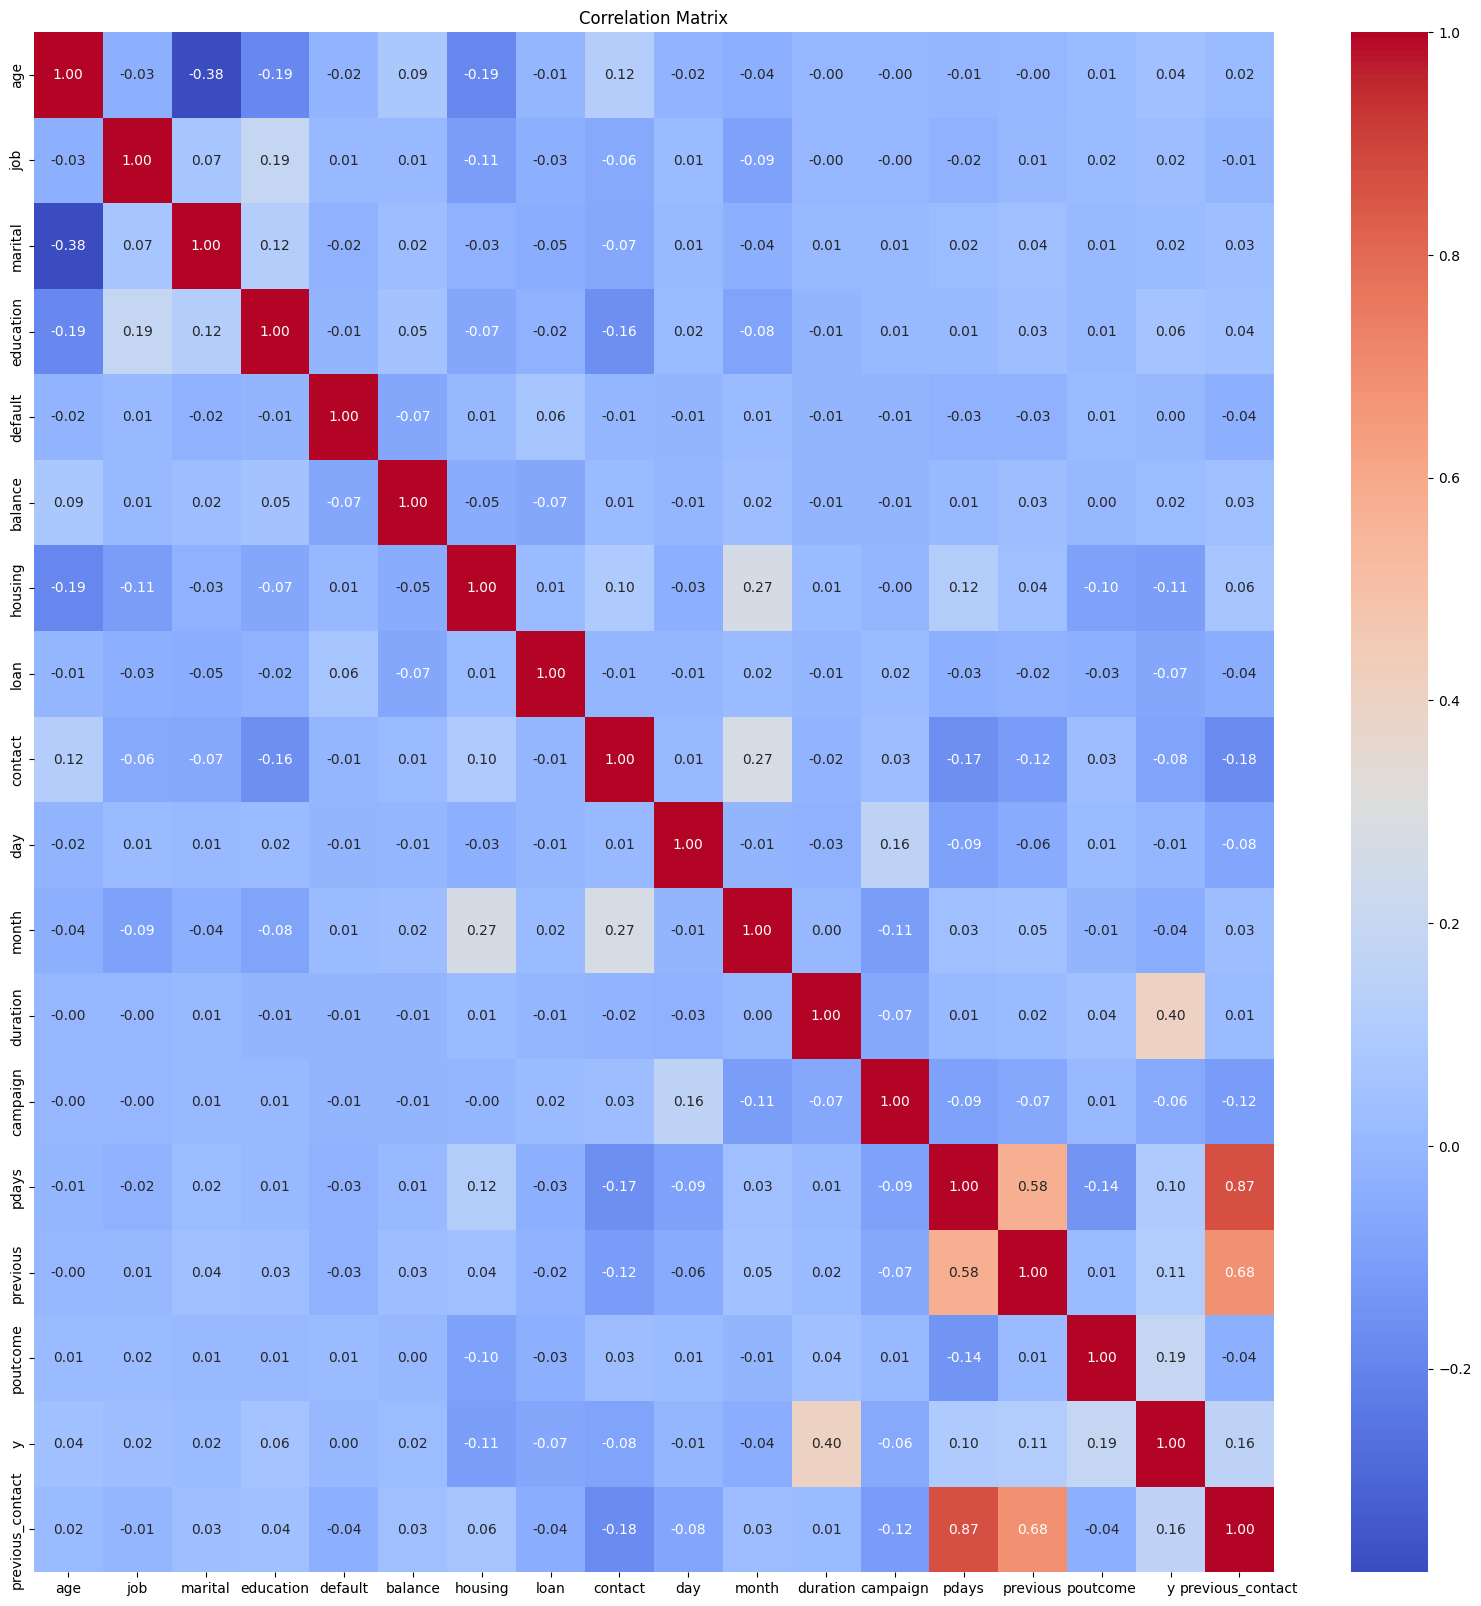

In [161]:
import seaborn as sns

corr_mat = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr_mat,annot=True,fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [162]:
corr_with_y = df.corr()['y'].sort_values(key=abs, ascending=False)

In [163]:
corr_with_y

y                   1.000000
duration            0.401523
poutcome            0.192593
previous_contact    0.158547
previous            0.113882
housing            -0.105076
pdays               0.098478
contact            -0.081753
loan               -0.072002
campaign           -0.060425
education           0.056882
month              -0.043870
age                 0.042624
job                 0.024273
balance             0.018250
marital             0.015263
day                -0.009759
default             0.001552
Name: y, dtype: float64

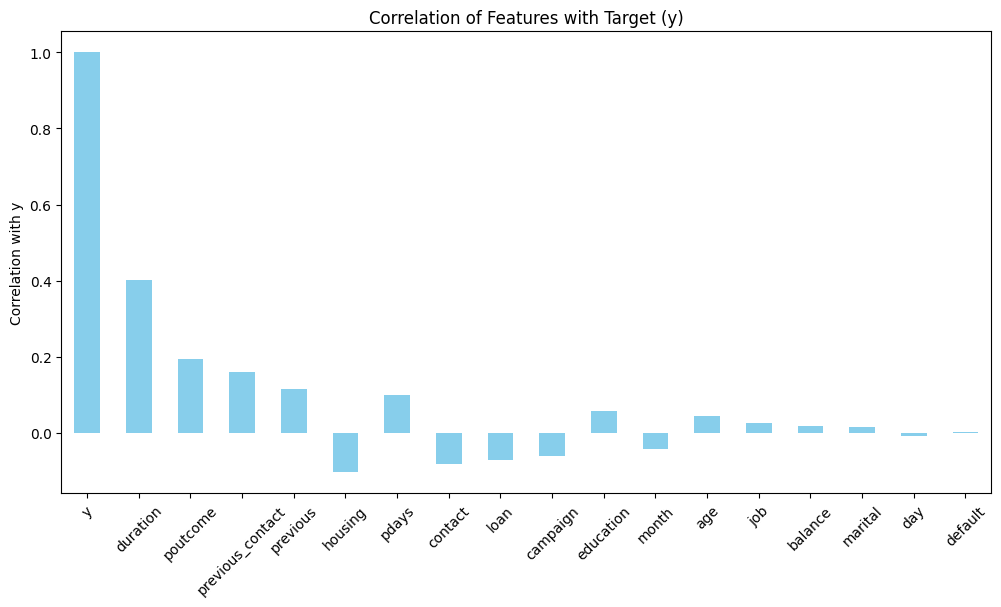

In [164]:
plt.figure(figsize=(12,6))
corr_with_y.plot(kind='bar', color='skyblue')
plt.title("Correlation of Features with Target (y)")
plt.ylabel("Correlation with y")
plt.xticks(rotation=45)
plt.show()

In [ ]:
corr_with_y = df.corr()['y'].sort_values(key=abs, ascending=False)


top_10_features = corr_with_y.index[1:11].tolist()


In [171]:
X = df[top_10_features]
X

,duration,poutcome,previous_contact,previous,housing,pdays,contact,loan,campaign,education
0,-0.712253,1,-0.469604,-0.320061,0,-0.407935,0,0,-0.576173,0
1,-0.170455,0,2.129452,2.037925,1,2.996887,0,1,-0.576173,1
2,-0.304944,0,2.129452,0.269435,1,2.906493,0,0,-0.576173,2
3,-0.251149,1,-0.469604,-0.320061,1,-0.407935,1,1,0.386430,2
4,-0.147400,1,-0.469604,-0.320061,1,-0.407935,1,0,-0.576173,1
...,...,...,...,...,...,...,...,...,...,...
4516,0.248382,1,-0.469604,-0.320061,1,-0.407935,0,0,0.707298,1
4517,-0.427905,1,-0.469604,-0.320061,1,-0.407935,1,1,-0.576173,2
4518,-0.435590,1,-0.469604,-0.320061,0,-0.407935,0,0,2.632504,1
4519,-0.520126,2,2.129452,1.448429,0,1.711290,0,0,0.386430,1


In [172]:
y = df['y']

In [173]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8940914158305463
Confusion Matrix:
 [[775  18]
 [ 77  27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       793
           1       0.60      0.26      0.36       104

    accuracy                           0.89       897
   macro avg       0.75      0.62      0.65       897
weighted avg       0.87      0.89      0.88       897



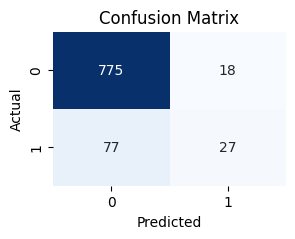

In [177]:
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

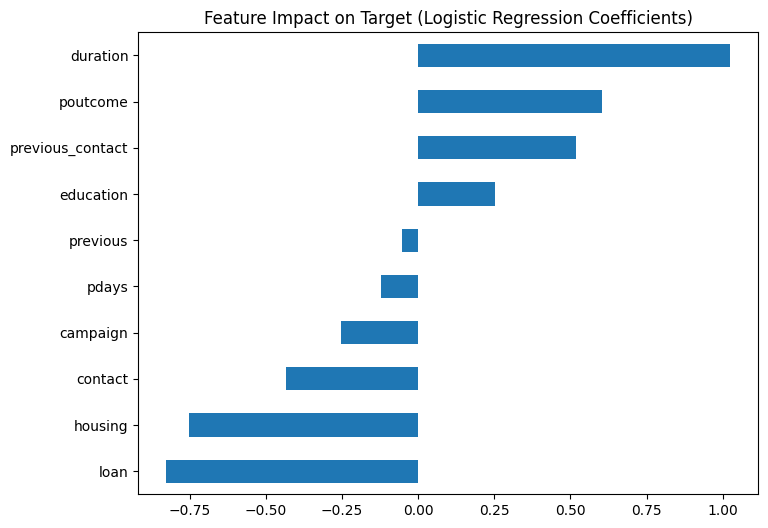

In [175]:
coefficients = pd.Series(model.coef_[0], index=top_10_features)
coefficients.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Impact on Target (Logistic Regression Coefficients)")
plt.show()

In [178]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [179]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [180]:
def plot_cm(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No','Yes'], yticklabels=['No','Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()


--- SVM ---
Accuracy: 0.9007803790412486
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       793
           1       0.67      0.28      0.39       104

    accuracy                           0.90       897
   macro avg       0.79      0.63      0.67       897
weighted avg       0.88      0.90      0.88       897



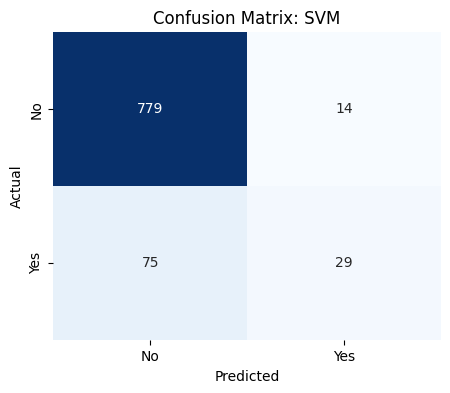

--- Random Forest ---
Accuracy: 0.875139353400223
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       793
           1       0.46      0.39      0.42       104

    accuracy                           0.88       897
   macro avg       0.69      0.67      0.68       897
weighted avg       0.87      0.88      0.87       897



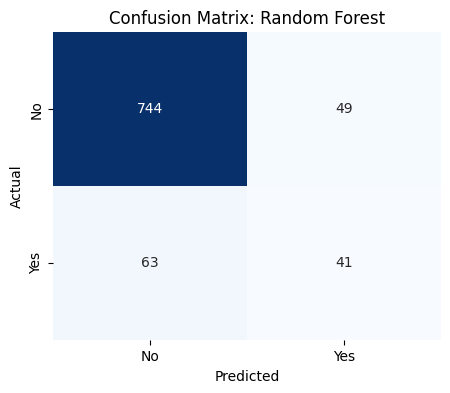

In [182]:
models = {
          'SVM': y_pred_svm,
          'Random Forest': y_pred_rf}

for name, y_pred in models.items():
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    plot_cm(y_test, y_pred, name)


In [183]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [184]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}


In [185]:
cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')  
    cv_results[name] = scores
    print(f"{name} Cross-Validation Scores: {scores}")
    print(f"{name} Average Accuracy: {np.mean(scores):.4f}\n")


Logistic Regression Cross-Validation Scores: [0.88641425 0.89977728 0.8908686  0.91071429 0.890625   0.91071429
 0.87723214 0.90848214 0.90848214 0.88392857]
Logistic Regression Average Accuracy: 0.8967

SVM Cross-Validation Scores: [0.88864143 0.90423163 0.90200445 0.90401786 0.89732143 0.90848214
 0.88616071 0.89955357 0.90848214 0.89508929]
SVM Average Accuracy: 0.8994

Random Forest Cross-Validation Scores: [0.87082405 0.89309577 0.86636971 0.88169643 0.88616071 0.88392857
 0.875      0.90178571 0.84598214 0.86607143]
Random Forest Average Accuracy: 0.8771



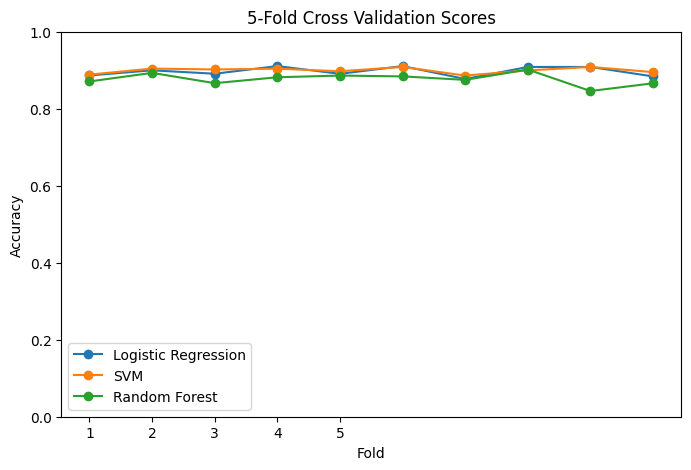

In [187]:
plt.figure(figsize=(8,5))

for name, scores in cv_results.items():
    plt.plot(range(1,11), scores, marker='o', label=name)

plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("5-Fold Cross Validation Scores")
plt.xticks(range(1,6))
plt.ylim(0,1)
plt.legend()
plt.show()